In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# getting the monthly data of the stock
titan_df=yf.download('TITAN.NS', period = "5y", interval= "1mo", auto_adjust=True)
titan_df=titan_df['Close']
titan_df['titan_Ret']=np.log(titan_df/titan_df.shift(1))

[*********************100%***********************]  1 of 1 completed


In [73]:
# getting the market returns
nifty_df=yf.download('^NSEI', period = "5y", interval= "1mo", auto_adjust=True)
nifty_df=nifty_df['Close']
nifty_df['nifty_Ret']=np.log(nifty_df/nifty_df.shift(1))

nifty_df
titan_df


[*********************100%***********************]  1 of 1 completed


Ticker,TITAN.NS,titan_Ret
Date,,
2020-09-01,1182.950928,NaN
2020-10-01,1147.895996,-0.030081
2020-11-01,1340.352661,0.155002
2020-12-01,1543.148438,0.140892
2021-01-01,1398.547607,-0.098390
2021-02-01,1385.352783,-0.009479
2021-03-01,1534.187744,0.102046
2021-04-01,1468.804688,-0.043552
2021-05-01,1571.802856,0.067774


In [74]:
# Beta Regression
returns = pd.DataFrame({
    'nifty_Ret': nifty_df['nifty_Ret'],
    'titan_Ret': titan_df['titan_Ret']
}).dropna()

X = returns['nifty_Ret']
y = returns['titan_Ret']

X = sm.add_constant(X)

model=sm.OLS(y,X).fit()

print(model.summary())

alpha = model.params['const']
beta = model.params['nifty_Ret']

print("alpha=", alpha)
print("beta=", beta)

                            OLS Regression Results                            
Dep. Variable:              titan_Ret   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     44.46
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           1.14e-08
Time:                        23:32:13   Log-Likelihood:                 86.583
No. Observations:                  59   AIC:                            -169.2
Df Residuals:                      57   BIC:                            -165.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.008      0.213      0.8

In [75]:

# Assumptions for Cost of Equity (CAPM)

Rf = 0.064   # 6.4% Based on the 10-year Indian Government Security yield (Aug 2025).

ERP = 0.06   # 6.0% Long-term India estimate (Damodaran / market benchmarks).

CRP = 0.015  # 1.5% Reflects India-specific sovereign/policy risk, derived from sovereign bond spreads / CDS data.

cost_of_equity= (Rf+beta*(ERP+CRP))
print(cost_of_equity)

0.16063103944814466


In [76]:
# cost of debt

stock=yf.Ticker("TITAN.NS")
is_df=stock.financials

# Using FY2025 EBIT & Interest since WACC is forward-looking 
# and the latest year best reflects Titan’s current performance.

ebit=is_df.loc["EBIT", "3/31/2025"] 
interest_expense=is_df.loc["Interest Expense", "3/31/2025"]

interest_coverage_ratio=ebit/interest_expense

credit_spread= 0.01   # from Damodaran’s synthetic rating table
T = 0.30   # 30% corporate tax rate (India, large companies)

cost_of_debt=(Rf+credit_spread)*(1-T)

In [77]:
# WACC

price=titan_df.loc["2025-08-01", "TITAN.NS"]
bs_df=stock.balance_sheet
no_of_shares=bs_df.loc["Ordinary Shares Number", "2025-03-31"]
debt=bs_df.loc["Total Debt", "2025-03-31"]
equity_value=no_of_shares*price
weight_of_equity=(equity_value/(equity_value+debt))
weight_of_debt=1-weight_of_equity

WACC_base=(cost_of_equity*weight_of_equity)+(weight_of_debt*cost_of_debt)


## U.S. Tariff Shock  

While the base case WACC (~15%) represents Titan’s cost of capital in a stable environment, 
policy risks such as **U.S. tariffs on Indian exports** can alter this picture.  

Tariffs increase business uncertainty, raise the company’s earnings volatility, 
and add to India’s perceived country risk premium.  
They can also dent investor sentiment, reducing Titan’s equity value in the short run.  



In [61]:
beta_tariff   = beta * 1.10   # Beta increased by 10% as per Damodaran’s stress-test range (5–15%) and 2018 tariff war precedent
CRP_tariff     = 0.02   # +50 bps country/policy risk premium
spread_tariff  = credit_spread + 0.0025  # +25 bps credit spread due to risk perception
E_tariff  = equity_value*(1-0.07)    # -7% equity value to mimic short-run market reaction
weight_of_equity_tariff=(E_tariff/(E_tariff+debt))
weight_of_debt_tariff=1-weight_of_equity_tariff

cost_of_equity_tariff = Rf + beta_tariff*(CRP_tariff+ERP)
cost_of_debt_tariff = (1-T)*(Rf+spread_tariff)
WACC_tariff= (cost_of_equity_tariff*weight_of_equity_tariff)+(cost_of_debt_tariff*weight_of_debt_tariff)
print(WACC_tariff)

0.17014024378030498


### Fed Hikes  

While tariffs directly raise Titan’s business risk by making its earnings more volatile,  
the U.S. Federal Reserve’s actions affect Titan in a different way.  
A Fed rate hike doesn’t change Titan’s relative sensitivity to the Indian market (beta),  
but it does raise the global risk-free rate and widens credit spreads,  
making both equity and debt capital more expensive.  

We model how a recent 50 bps Fed hike translates into a higher risk-free rate and spread,  
and see how that pushes Titan’s WACC upward.  


In [62]:
beta = 1.297 # Beta unchanged in Fed case since rate hikes raise discount rates (Rf, spreads) but don’t alter Titan’s relative volatility to NIFTY.
Rf_fed = Rf +  0.005 # Rf raised by +50 bps to 6.9% to reflect Fed hike impact on India’s 10Y G-Sec yields.  
spread_fed  = credit_spread + 0.0025 # Credit spread raised by +25 bps as Fed hikes tighten global liquidity and raise EM borrowing costs.  


cost_of_equity_fed = Rf_fed + beta*(CRP_tariff+ERP)
cost_of_debt_fed = (1-T)*(Rf_fed+spread_fed)
WACC_fed= (cost_of_equity_fed*weight_of_equity)+(cost_of_debt_fed*weight_of_debt)
print(WACC_fed)

0.16578495762814255


### Bringing the Shocks Together  

Individually, tariffs raise Titan’s company-specific risk,  
while Fed hikes increase the broader cost of capital through higher rates and spreads.  
But in reality, these shocks often occur together, trade tensions and tighter global liquidity  
can reinforce each other.  

In the combined case, we layer both effects: higher beta, a larger country risk premium,  
a higher risk-free rate, wider credit spreads, and a dip in equity value.  
This scenario captures the compounded impact on Titan’s WACC.  


In [63]:
beta_combined   = beta * 1.10       # +10% beta to reflect higher volatility (tariff stress)
Rf_combined     = Rf + 0.005        # Risk-free raised +50 bps (Fed hike impact on India 10Y G-Sec)
CRP_combined    = CRP + 0.005       # +50 bps country risk premium (policy/trade risk)
spread_combined = credit_spread + 0.0025 + 0.0025  # +50 bps credit spread (tariff + Fed liquidity effect)
E_combined      = equity_value * 0.90          # Equity value cut by 10% (market cap hit from dual shocks)

cost_of_equity_combined = Rf_combined + beta_combined*(CRP_combined+ERP)
cost_of_debt_combined = (1-T)*(Rf_combined+spread_combined)
weight_of_equity_combined=(E_combined/(E_combined+debt))
weight_of_debt_combined=1-weight_of_equity_combined

WACC_combined= (cost_of_equity_combined*weight_of_equity_combined)+(cost_of_debt_combined*weight_of_debt_combined)
print(WACC_combined)

0.17486360600272238


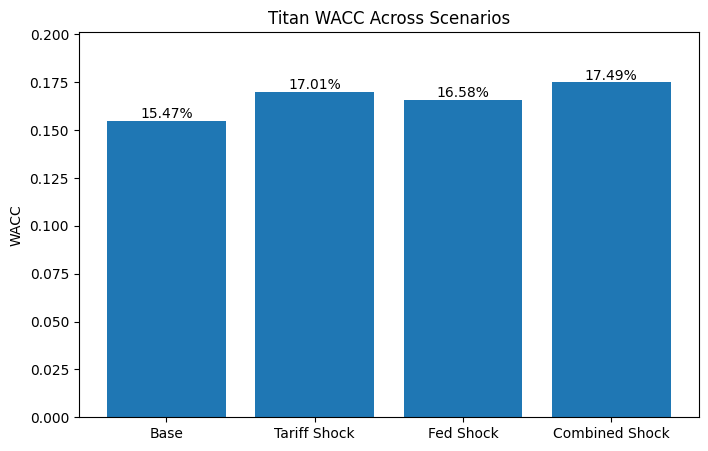

In [70]:
labels = ["Base", "Tariff Shock", "Fed Shock", "Combined Shock"]
wacc_values = [WACC_base, WACC_tariff, WACC_fed, WACC_combined]

# If your WACCs are in percent (e.g., 16.57), convert to decimals:
if max(wacc_values) > 1:
    wacc_values = [x/100 for x in wacc_values]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, wacc_values)

# Add % labels on top of bars
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{h*100:.2f}%", ha="center", va="bottom")

plt.title("Titan WACC Across Scenarios")
plt.ylabel("WACC")
plt.ylim(0, max(wacc_values)*1.15)
plt.show()


The bar chart clearly shows how Titan’s Weighted Average Cost of Capital (WACC) 
rises across different scenarios:  

- **Base Case (~15%)** → Titan’s cost of capital under normal conditions, 
  reflecting India’s high risk-free rate and Titan’s equity-heavy structure.  

- **U.S. Tariff Shock (~16%)** → Policy risk adds volatility (higher beta), 
  increases India’s country risk premium, and slightly reduces equity value, 
  pushing WACC higher.  

- **Fed Shock (~16.6%)** → A 50 bps rise in global risk-free rates (Rf) and 
  wider credit spreads increase discount rates, even though Titan’s beta 
  remains unchanged.  

- **Combined Shock (~17.5%)** → Both tariff and Fed effects stack together, 
  leading to the sharpest rise in WACC. This highlights how multiple external 
  shocks compound to significantly increase the company’s cost of capital.  


### Conclusion  

Titan’s base WACC is around 15.5%. But with the latest **Fed rate hikes feeding into higher global yields** 
and the newly announced **U.S. tariffs on Indian exports**, the number shifts meaningfully.  
Under tariffs, WACC moves to ~17.0%; under Fed hikes, ~16.6%; and with both combined, it peaks at ~17.5%.  

The takeaway is clear: what looks like small macro moves, a 50 bps Fed hike or a new tariff barrier,  
can add almost 200 bps to a company’s cost of capital. For an equity-heavy firm like Titan, 
that difference is large enough to materially compress valuations, 
showing how global policy shifts are now directly reflected in corporate finance metrics.
